In [2]:
import glob
import os

import numpy as np
import matplotlib.pyplot as plt

import cv2

from tqdm.notebook import tqdm

In [3]:
plt.rcParams["figure.figsize"] = 16, 9

In [15]:
def load_img(p):
    """Load image given its path."""
    img = cv2.imread(p)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img


def iou(pred, gt):
    """Compute the intersection over union (IoU)/Jaccard index."""
    intersection = (pred * gt).sum()
    union = pred.sum() + gt.sum() - intersection
    print(f"intersection: {intersection}")
    
    print(f"union: {union}")
    print(f"pred.sum(): {pred.sum()}")
    print(f"gt.sum(): {gt.sum()}")
    
    if union == 0:
        return 1.0
    else:
        return intersection/union
    
    
def get_boxes(p):
    """Get ground truth/prediction boxes from text file."""
    with open(p, "r") as f:
        lines = f.readlines()
        
    boxes = []
    ignored_boxes = []
    for line in lines:
        box = list(map(int, line.rstrip('\n').lstrip('\ufeff').split(',')[:8]))
        box = np.array(box).reshape(-1, 2)
            
        label = 0 if '###' in line else 1
        if label:
            boxes.append(box)
        else:
            ignored_boxes.append(box)
#     print(f"num_boxes: {boxes}")
    
    return boxes, ignored_boxes

In [28]:
ICDAR_2015_DIR = "/home/gx/datasets/ICDAR_2015/"
# PREDICTION_DIR = "./predictions_icdar2015test_vgg16bn_scope512_inter128_64_32_merged32_icdar2015/"
# PREDICTION_DIR = "./predictions_icdar2015test_vgg16bn_scope512_inter128_64_32_merged32_icdar2015__score0.5_nms0.2/"
# PREDICTION_DIR = "./predictions_icdar2015test_rn50_scope512_inter128_64_32_merged32_icdar2015__score0.5_nms0.2/"
# PREDICTION_DIR = "./predictions_icdar2015test_xception_scope512_inter256_128_64_merged32_icdar2015__score0.5_nms0.2/"
# PREDICTION_DIR = "./predictions_icdar2015test_deeplabv3plus_resnet50_scope512_merged32_icdar2015__score0.5_nms0.2/"
PREDICTION_DIR = "./predictions_icdar2015test_mobilenetv2_scope512_inter128_64_32_merged32_icdar2015__score0.5_nms0.2/"

In [29]:
ious = []
for img_file in tqdm(os.listdir(os.path.join(ICDAR_2015_DIR, "test_img"))):
    # Get image
    img_path = os.path.join(ICDAR_2015_DIR, "test_img", img_file)
    img = load_img(img_path)
#     plt.imshow(img)
    
    # Get ground truth boxes
    img_file_basename = os.path.splitext(os.path.basename(img_file))[0]
    gt_path = os.path.join(ICDAR_2015_DIR, "test_gt", f"gt_{img_file_basename}.txt")
    gt_boxes, gt_boxes_ignored = get_boxes(gt_path)
    
    # Get predicted boxes
    try:
        pred_path = os.path.join(PREDICTION_DIR, "res", f"{img_file_basename}.txt")
        pred_boxes, _ = get_boxes(pred_path)
    except:
        pred_boxes = []
    
    # Get gt and prediction masks
    h, w = img.shape[:2]
    gt_map = cv2.fillPoly(np.zeros((h, w)), gt_boxes, 1.0)
#     print(f"gt_map shape: {gt_map.shape}")
    gt_map_ignored = cv2.fillPoly(np.zeros((h, w)), gt_boxes_ignored, 1.0)
#     print(f"gt_map_ignored shape: {gt_map_ignored.shape}")
    pred_map = cv2.fillPoly(np.zeros((h, w)), pred_boxes, 1.0)
#     print(f"pred_map shape: {pred_map.shape}")
    pred_map = pred_map * (1.0 - gt_map_ignored)
    
    # Compute IoU between the two masks
    _iou = iou(pred_map, gt_map)
    print(_iou)
    
    ious.append(_iou)

intersection: 6511.0
union: 8007.0
pred.sum(): 7439.0
gt.sum(): 7079.0
0.8131634819532909
intersection: 5923.0
union: 8564.0
pred.sum(): 7551.0
gt.sum(): 6936.0
0.6916160672582905
intersection: 7007.0
union: 12245.0
pred.sum(): 10850.0
gt.sum(): 8402.0
0.572233564720294
intersection: 7349.0
union: 14685.0
pred.sum(): 10901.0
gt.sum(): 11133.0
0.5004426285325162
intersection: 7326.0
union: 14793.0
pred.sum(): 7372.0
gt.sum(): 14747.0
0.49523423240721964
intersection: 14266.0
union: 22030.0
pred.sum(): 19828.0
gt.sum(): 16468.0
0.6475714934180663
intersection: 2545.0
union: 3605.0
pred.sum(): 3561.0
gt.sum(): 2589.0
0.7059639389736477
intersection: 9696.0
union: 14324.0
pred.sum(): 11869.0
gt.sum(): 12151.0
0.6769058922088802
intersection: 17456.0
union: 33689.0
pred.sum(): 27893.0
gt.sum(): 23252.0
0.5181513253584256
intersection: 23824.0
union: 35921.0
pred.sum(): 32391.0
gt.sum(): 27354.0
0.6632332062024999
intersection: 31594.0
union: 37537.0
pred.sum(): 36552.0
gt.sum(): 32579.0
0.8

intersection: 3300.0
union: 4600.0
pred.sum(): 4072.0
gt.sum(): 3828.0
0.717391304347826
intersection: 12189.0
union: 15283.0
pred.sum(): 14113.0
gt.sum(): 13359.0
0.7975528364849833
intersection: 5811.0
union: 6866.0
pred.sum(): 6518.0
gt.sum(): 6159.0
0.8463443052723565
intersection: 14201.0
union: 17062.0
pred.sum(): 16037.0
gt.sum(): 15226.0
0.8323174305474154
intersection: 16406.0
union: 20081.0
pred.sum(): 19175.0
gt.sum(): 17312.0
0.8169911856979234
intersection: 7045.0
union: 11004.0
pred.sum(): 9034.0
gt.sum(): 9015.0
0.6402217375499818
intersection: 0.0
union: 0.0
pred.sum(): 0.0
gt.sum(): 0.0
1.0
intersection: 18272.0
union: 37113.0
pred.sum(): 19473.0
gt.sum(): 35912.0
0.49233422250963277
intersection: 14839.0
union: 18327.0
pred.sum(): 17211.0
gt.sum(): 15955.0
0.8096797075353304
intersection: 4422.0
union: 7636.0
pred.sum(): 6713.0
gt.sum(): 5345.0
0.5790990047145103
intersection: 9938.0
union: 26669.0
pred.sum(): 25582.0
gt.sum(): 11025.0
0.3726423937905433
intersection:

intersection: 3438.0
union: 5534.0
pred.sum(): 5287.0
gt.sum(): 3685.0
0.6212504517528009
intersection: 5092.0
union: 10394.0
pred.sum(): 10394.0
gt.sum(): 5092.0
0.4898980180873581
intersection: 15855.0
union: 21460.0
pred.sum(): 20074.0
gt.sum(): 17241.0
0.7388164026095061
intersection: 23452.0
union: 40860.0
pred.sum(): 29734.0
gt.sum(): 34578.0
0.5739598629466471
intersection: 2091.0
union: 2971.0
pred.sum(): 2746.0
gt.sum(): 2316.0
0.703803433187479
intersection: 441.0
union: 1487.0
pred.sum(): 1487.0
gt.sum(): 441.0
0.2965702757229321
intersection: 10924.0
union: 16342.0
pred.sum(): 13569.0
gt.sum(): 13697.0
0.6684616326031085
intersection: 23682.0
union: 38803.0
pred.sum(): 23817.0
gt.sum(): 38668.0
0.6103136355436435
intersection: 26868.0
union: 36469.0
pred.sum(): 35026.0
gt.sum(): 28311.0
0.736735309440895
intersection: 14137.0
union: 27941.0
pred.sum(): 14137.0
gt.sum(): 27941.0
0.5059589850041158
intersection: 31175.0
union: 43336.0
pred.sum(): 33603.0
gt.sum(): 40908.0
0.7

intersection: 20236.0
union: 38982.0
pred.sum(): 27752.0
gt.sum(): 31466.0
0.5191113847416756
intersection: 6648.0
union: 8789.0
pred.sum(): 7451.0
gt.sum(): 7986.0
0.7564000455114347
intersection: 7587.0
union: 15349.0
pred.sum(): 15252.0
gt.sum(): 7684.0
0.4942993028861815
intersection: 1482.0
union: 3058.0
pred.sum(): 3021.0
gt.sum(): 1519.0
0.48463047743623283
intersection: 3249.0
union: 4027.0
pred.sum(): 3573.0
gt.sum(): 3703.0
0.8068040725105537
intersection: 2874.0
union: 3943.0
pred.sum(): 3940.0
gt.sum(): 2877.0
0.7288866345422267
intersection: 11177.0
union: 15692.0
pred.sum(): 12151.0
gt.sum(): 14718.0
0.712273770073923
intersection: 5705.0
union: 13180.0
pred.sum(): 6768.0
gt.sum(): 12117.0
0.4328528072837633
intersection: 17056.0
union: 24400.0
pred.sum(): 20033.0
gt.sum(): 21423.0
0.6990163934426229
intersection: 6748.0
union: 11360.0
pred.sum(): 10527.0
gt.sum(): 7581.0
0.5940140845070423
intersection: 11411.0
union: 17769.0
pred.sum(): 12956.0
gt.sum(): 16224.0
0.64218

intersection: 10116.0
union: 12697.0
pred.sum(): 10684.0
gt.sum(): 12129.0
0.7967236355044499
intersection: 14232.0
union: 29960.0
pred.sum(): 24036.0
gt.sum(): 20156.0
0.47503337783711613
intersection: 10704.0
union: 14964.0
pred.sum(): 12175.0
gt.sum(): 13493.0
0.7153167602245389
intersection: 18739.0
union: 38429.0
pred.sum(): 18745.0
gt.sum(): 38423.0
0.487626532046111
intersection: 20784.0
union: 29543.0
pred.sum(): 23094.0
gt.sum(): 27233.0
0.7035169075584741
intersection: 10286.0
union: 14760.0
pred.sum(): 14330.0
gt.sum(): 10716.0
0.6968834688346883
intersection: 18182.0
union: 23094.0
pred.sum(): 21753.0
gt.sum(): 19523.0
0.7873040616610375
intersection: 3815.0
union: 4433.0
pred.sum(): 3957.0
gt.sum(): 4291.0
0.8605910218813445
intersection: 6079.0
union: 7990.0
pred.sum(): 6791.0
gt.sum(): 7278.0
0.7608260325406758
intersection: 2121.0
union: 2915.0
pred.sum(): 2244.0
gt.sum(): 2792.0
0.7276157804459691
intersection: 10807.0
union: 31247.0
pred.sum(): 11380.0
gt.sum(): 30674

intersection: 18600.0
union: 24133.0
pred.sum(): 22588.0
gt.sum(): 20145.0
0.7707288774706833
intersection: 35290.0
union: 97095.0
pred.sum(): 37600.0
gt.sum(): 94785.0
0.36345846851022195
intersection: 39593.0
union: 53359.0
pred.sum(): 46233.0
gt.sum(): 46719.0
0.7420116568901216
intersection: 2639.0
union: 3706.0
pred.sum(): 3050.0
gt.sum(): 3295.0
0.7120885051268214
intersection: 5547.0
union: 6991.0
pred.sum(): 6014.0
gt.sum(): 6524.0
0.7934487197825776
intersection: 17454.0
union: 46656.0
pred.sum(): 19381.0
gt.sum(): 44729.0
0.3740997942386831
intersection: 5128.0
union: 6942.0
pred.sum(): 6773.0
gt.sum(): 5297.0
0.738692019590896
intersection: 15214.0
union: 26390.0
pred.sum(): 16221.0
gt.sum(): 25383.0
0.5765062523683213
intersection: 10268.0
union: 13122.0
pred.sum(): 12934.0
gt.sum(): 10456.0
0.7825026672763298
intersection: 3733.0
union: 5485.0
pred.sum(): 3890.0
gt.sum(): 5328.0
0.6805834092980857
intersection: 3936.0
union: 4526.0
pred.sum(): 4171.0
gt.sum(): 4291.0
0.869

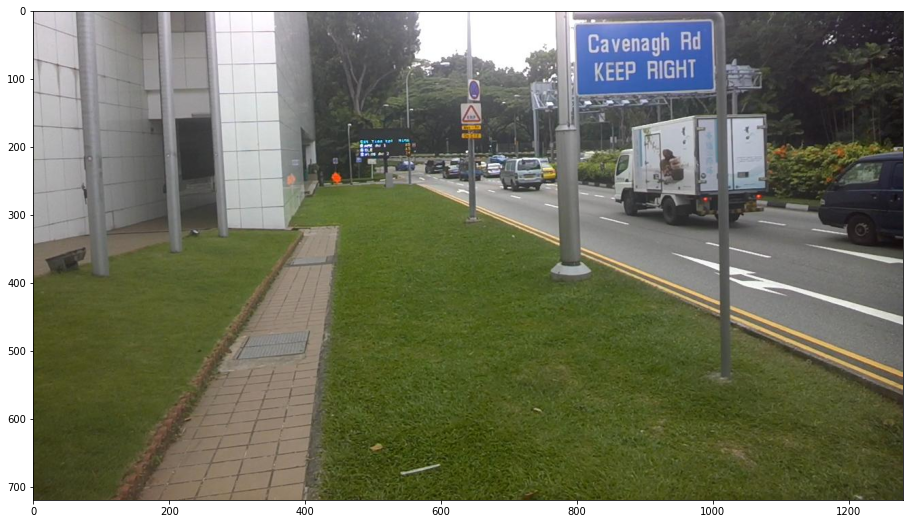

In [30]:
plt.imshow(img)

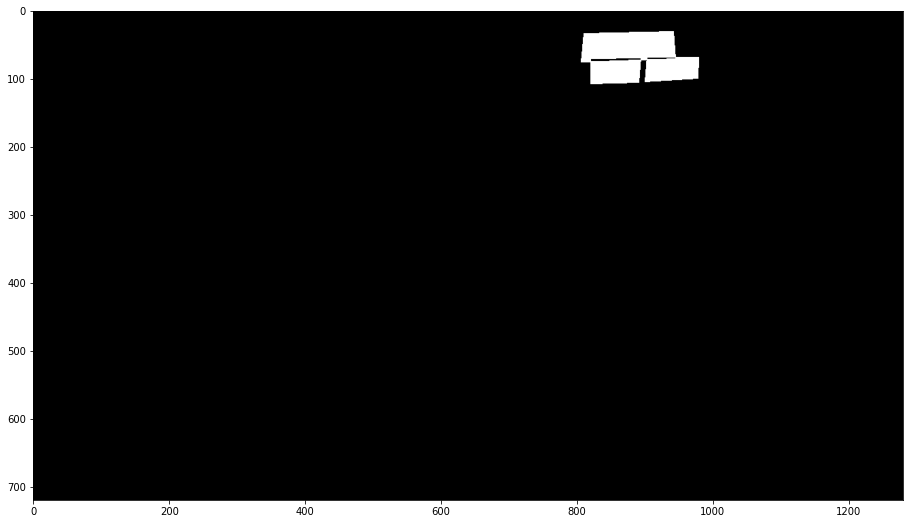

In [31]:
plt.imshow(gt_map, cmap="gray")

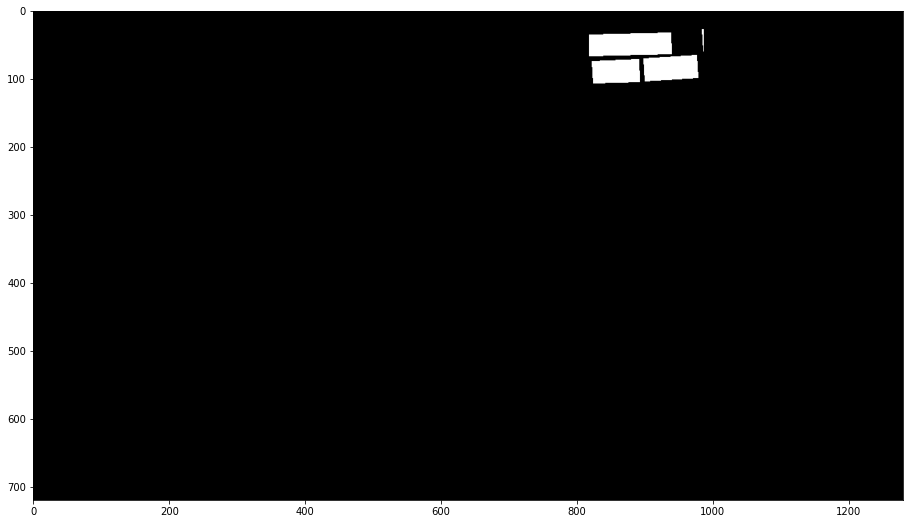

In [32]:
plt.imshow(pred_map, cmap="gray")

In [33]:
iou(pred_map, gt_map)

intersection: 8670.0
union: 10717.0
pred.sum(): 8983.0
gt.sum(): 10404.0


0.8089950545861715

In [34]:
print("MAP@0.5:", np.mean(ious))

MAP@0.5: 0.6403391504603062


- predictions_icdar2015test_vgg16bn_scope512_inter128_64_32_merged32_icdar2015__score0.5_nms0.2 (squashed resized) - 0.6211893346612823
- predictions_icdar2015test_vgg16bn_scope512_inter128_64_32_merged32_icdar2015__score0.5_nms0.2 (full image) - 0.6471982253849335
- predictions_icdar2015test_mobilenetv2_scope512_inter128_64_32_merged32_icdar2015__score0.5_nms0.2 (full image) - 64.03

## Old runs
- predictions_icdar2015test_rn50_scope512_inter128_64_32_merged32_icdar2015__score0.5_nms0.2 - 0.563725585011196
- predictions_icdar2015test_xception_scope512_inter256_128_64_merged32_icdar2015__score0.5_nms0.2 (squashed resize 512) -  0.58447023524937608
- predictions_icdar2015test_xception_scope512_inter256_128_64_merged32_icdar2015__score0.5_nms0.2 (full image) -  0.6087994302852715
- predictions_icdar2015test_deeplabv3plus_resnet50_scope512_merged32_icdar2015__score0.5_nms0.2 (full image) - 63.2